数据集是纽约大学提供的公开人脸数据库Olivetti Faces，其网址为https://cs.nyu.edu/~roweis/data/olivettifaces.gif

原图是一整张图片，含有40个人的脸部照片，每人10张。笔者将其拆分成400张jpg格式的图片，放在本案例代码所在的文件夹下的olivettifaces文件夹中，并按一定的规则对图片的文件名进行整理,1_[1-10].jpg 表示第一个人的10张照片

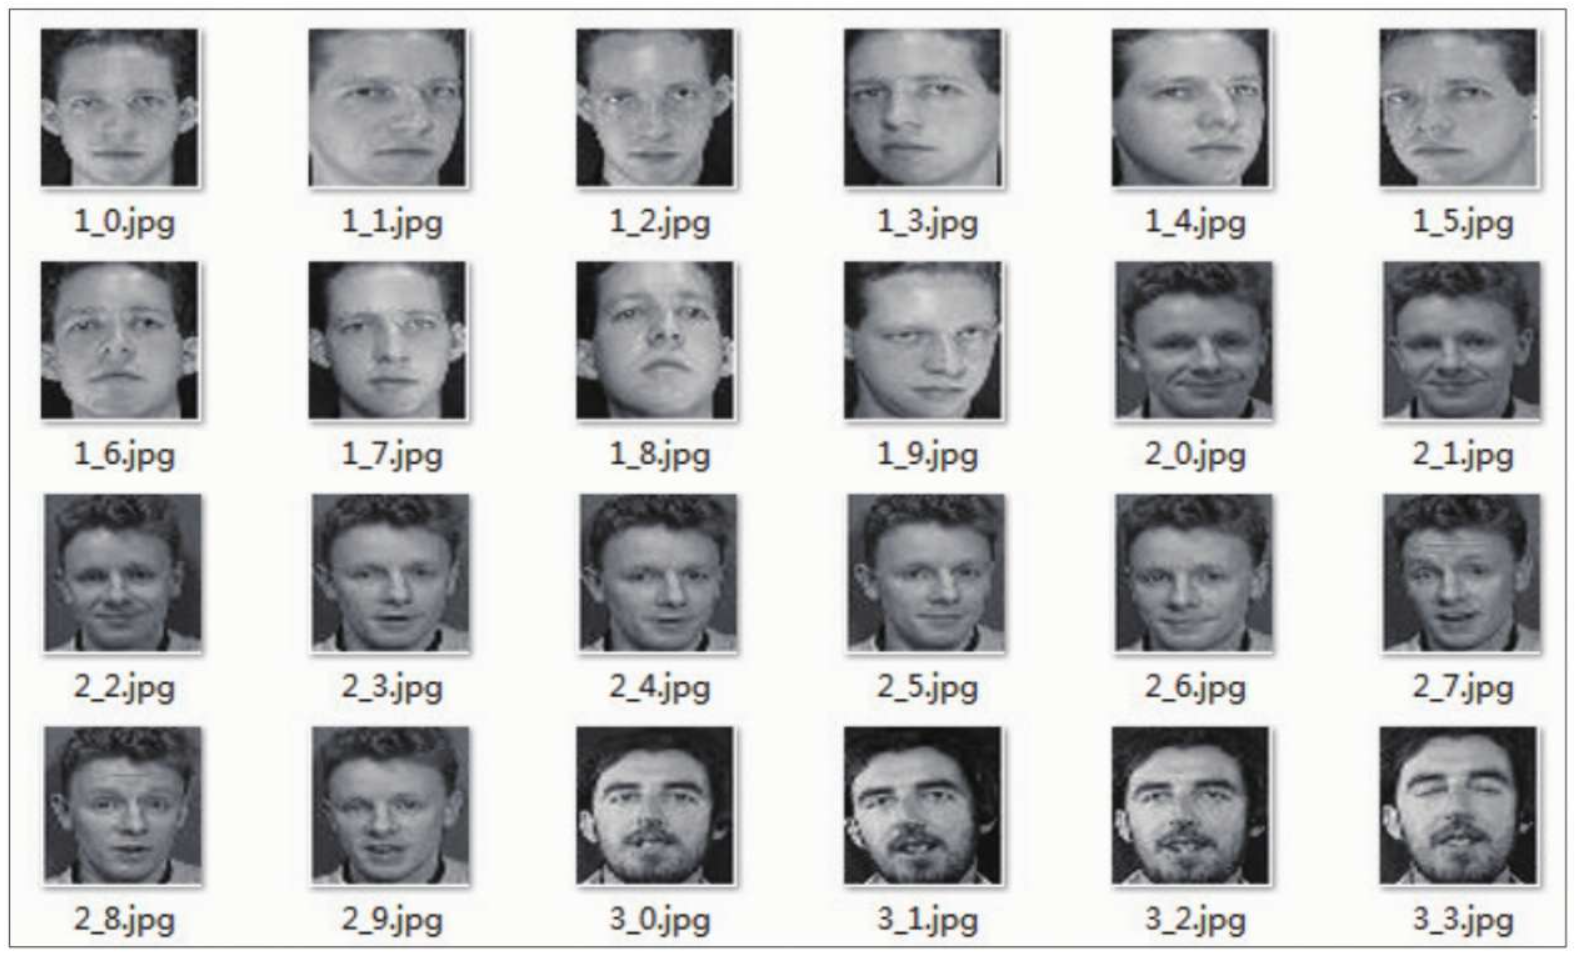

人脸识别在本质上是根据每张人脸图像中不同像素点的颜色进行数据建模与判断。人脸图像的每个像素点的颜色都有不同的值，这些值可以组成人脸的特征向量，不过因为人脸图像的像素点很多，所以特征变量也很多，需要利用PCA进行数据降维。

本示例先对人脸数据进行读取和处理，再通过PCA进行数据降维，最后用K近邻算法搭建模型进行人脸识别。

# 先处理一个图像作为示例

In [3]:
import os
names=os.listdir('./data/olivettifaces/')

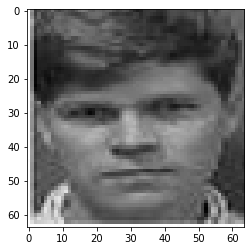

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
img0=Image.open('./data/olivettifaces/'+names[0])
plt.imshow(img0)
plt.show()

In [12]:
import numpy as np
# 将图片转换为数组
# 参数'L'指转换成灰度格式的图像。
# 在进行灰度处理后，图像的每个像素点的颜色就可以用0～255的数值表示，称为灰度值
# 其中0代表黑色，255代表白色，（0，255）区间的数值则代表不同程度的灰色
img0=img0.convert('L')
# 调整图片尺寸为32*32，即1024个像素点，1024个特征
img0=img0.resize((32,32))
# 转换为二维数据
arr=np.array(img0)
arr

array([[186,  76,  73, ..., 100, 103, 106],
       [196,  85,  68, ...,  85, 106, 103],
       [193,  69,  79, ...,  82,  99, 100],
       ...,
       [196,  87, 193, ..., 103,  66,  52],
       [219, 179, 202, ..., 150, 127, 109],
       [244, 228, 230, ..., 198, 202, 206]], dtype=uint8)

总共有400张图片的灰度值需要处理，若将400个二维数组堆叠起来会形成三维数组，所以我们需要用flatten()函数将1×1024的二维数组降维成一维数组，并用tolist()函数将其转换为列表，以便之后和其他图片的灰度值一起处理

In [13]:
arr.flatten().tolist()

[186,
 76,
 73,
 87,
 89,
 88,
 75,
 81,
 100,
 102,
 105,
 92,
 74,
 65,
 65,
 53,
 43,
 55,
 53,
 42,
 58,
 77,
 71,
 75,
 75,
 73,
 76,
 85,
 95,
 100,
 103,
 106,
 196,
 85,
 68,
 78,
 104,
 97,
 100,
 94,
 83,
 87,
 88,
 89,
 86,
 70,
 65,
 61,
 55,
 52,
 38,
 32,
 52,
 66,
 52,
 59,
 70,
 85,
 62,
 82,
 89,
 85,
 106,
 103,
 193,
 69,
 79,
 92,
 105,
 102,
 112,
 117,
 106,
 94,
 91,
 112,
 101,
 87,
 75,
 61,
 58,
 54,
 49,
 48,
 44,
 41,
 41,
 45,
 50,
 76,
 59,
 74,
 83,
 82,
 99,
 100,
 186,
 67,
 71,
 75,
 85,
 99,
 114,
 115,
 109,
 109,
 98,
 101,
 86,
 68,
 74,
 65,
 58,
 53,
 51,
 52,
 42,
 40,
 42,
 43,
 40,
 52,
 41,
 61,
 69,
 76,
 76,
 108,
 179,
 46,
 41,
 50,
 53,
 69,
 80,
 91,
 108,
 104,
 98,
 93,
 91,
 88,
 73,
 60,
 56,
 55,
 51,
 49,
 53,
 55,
 43,
 37,
 30,
 31,
 35,
 43,
 59,
 61,
 56,
 101,
 173,
 33,
 43,
 49,
 48,
 53,
 64,
 69,
 72,
 75,
 82,
 84,
 84,
 82,
 72,
 75,
 69,
 71,
 67,
 56,
 58,
 55,
 38,
 36,
 33,
 32,
 39,
 45,
 68,
 60,
 45,
 83,
 173,
 

# 处理图片

In [15]:
# 读取特征
X=[]
for i in names:
    img=Image.open('./data/olivettifaces/'+i)
    img=img.convert('L')
    img=img.resize((32,32))
    arr=np.array(img)
    X.append(arr.reshape(1,-1).flatten().tolist())
import pandas as pd
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,186,76,73,87,89,88,75,81,100,102,...,179,184,177,161,202,182,207,198,202,206
1,196,90,97,98,98,87,101,89,65,73,...,181,167,190,188,203,209,205,198,190,190
2,193,89,97,99,75,74,83,64,77,86,...,178,178,156,185,195,201,206,201,189,190
3,192,84,93,89,97,89,66,60,60,57,...,173,151,199,189,203,200,196,186,182,184
4,194,72,49,45,56,37,44,62,71,71,...,192,194,192,176,174,224,200,218,176,168


In [17]:
# 读取标签
y=[]
for i in names:
    img=Image.open('./data/olivettifaces/'+i)
    y.append(int(i.split('_')[0]))
y[:5]

[10, 10, 10, 10, 10]

In [24]:
# 数据集划分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# pca降维
from sklearn.decomposition import PCA
# 1024个特征降至100个
pca=PCA(n_components=100)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
# 模型训练
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
# 模型预测
y_pred=knn.predict(X_test_pca)
# 计算 accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("accuracy:{}".format(score))

accuracy:0.975


不降维直接训练

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
# 模型预测
y_pred=knn.predict(X_test)
# 计算 accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("accuracy:{}".format(score))

accuracy:0.8875
